# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-1 (39일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 하나의 범주형 변수를 요약하기

## 병원을 가장 찾는 사람은 누굴까?

공공 테이터 포털 (data.go.kr) 에서 각 정부부처에서 공개한 데이터들을 볼 수 있습니다. 그 중에서 건강보험공간에서 공개한 100만 건의 진료내역 정보를 살펴 봅시다. 원본 데이터는 2015년 약 100만건의 진료내역을 담고 있으나. 우리는 서울의 외래 진료내역인 약 200만건 데이터를 살펴 볼 것입니다.

In [2]:
treat = read.csv("Practice/data/treat.csv")

In [3]:
# 데이터의 구성을 살펴 볼 것입니다.
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : int  12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : int  2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


   * 이 데이터는 원본데이터를 가공한것입니다.
   * 5개의 변수를 선택하고, 숫자로 코딩되어 있던 AGE (연령대) 와 DSBJT(진료과목)을 건강보험공단의 코딩표를 참조하여 보기 쉽게 수정했습니다.
   * MAIN_SICK 은 환자가 병원에서 진료를 받을 때 질병의 종류를 구분한 코드 입니다.
   
   
   * str() 함수로 살펴 본 바, MONTH(수진월) 과 SEX(성별) 이 int 형태로 구렁되어 있습니다.
   * 의미상 범주형이므로 factor 를 사용해서 범주형 변수로 바꾸고 수준 이름도 바꿔 봅니다.

In [4]:
treat$MONTH = factor(treat$MONTH)
treat$SEX = factor(treat$SEX)
levels(treat$SEX)

[1] "1" "2"

In [5]:
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : Factor w/ 12 levels "1","2","3","4",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : Factor w/ 2 levels "1","2": 2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


MONTH 와 SEX 가 범주형 변수로 바뀌었습니다. 이제 levels 를 이용해서 수준을 바꾸어 봅니다.

In [6]:
levels(treat$SEX) = c("1_남", "2_여")

In [7]:
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : Factor w/ 12 levels "1","2","3","4",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : Factor w/ 2 levels "1_남","2_여": 2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


 #### treat 데이터 분석


이제 분석 준비가 되었습니다. 먼저 범주형 변수 요약을 합니다. 범주형 변수는 count 가 기본입니다. 따라서 각 수준별 count 를 해 봅니다.

In [8]:
# count 해서 테이블을 만들어 봅니다.
table(treat$MONTH)


     1      2      3      4      5      6      7      8      9     10     11 
174597 154287 182596 181855 168122 145505 154800 158540 168524 173414 168221 
    12 
186322 

월별 진료 건수를 계산했습니다. 건수가 많으므로, 1,000 건단위로 바꾸어 봅니다.

In [9]:
round(table(treat$MONTH)/1000)


  1   2   3   4   5   6   7   8   9  10  11  12 
175 154 183 182 168 146 155 159 169 173 168 186 

숫자라서 비교는 그래프가 아무래도 편합니다.

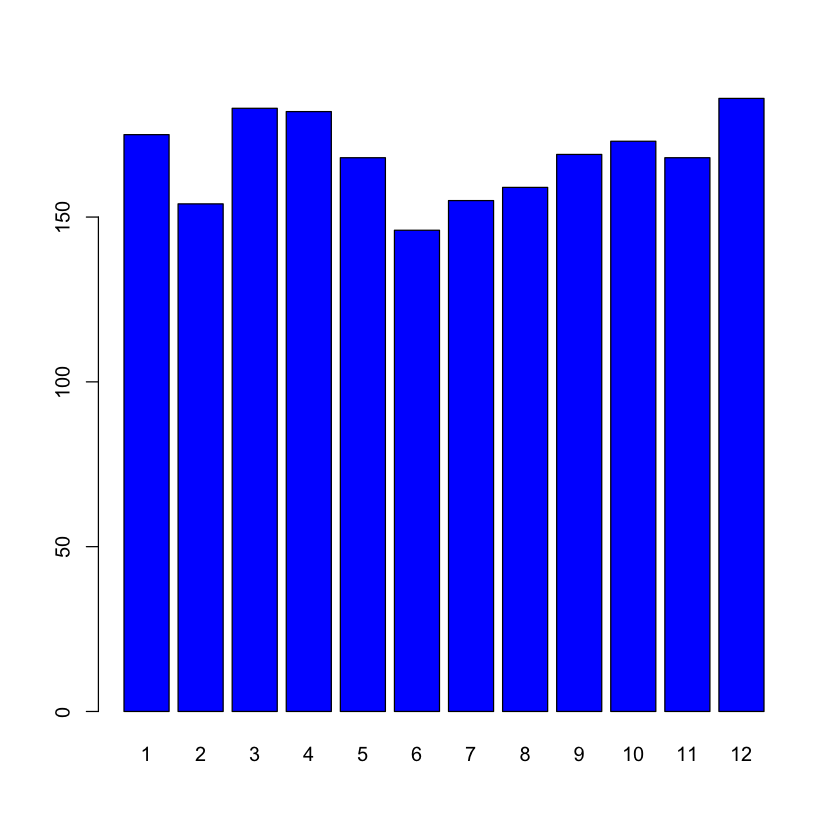

In [66]:
# 월별 진료환자의 막대 그래프
barplot(round(table(treat$MONTH)/1000), col="blue")

   * 2 월이 작은 것은 진료일수가 작은 이유일 것입니다.
   * 6 월이 최저 진료 건수 입니다.
   * 6 월 이후 환자수가 늘어 납니다.
   
   
   * 이번에는 AGE 변수를 활용해서 막대그래프를 그려 봅니다.

In [16]:
xx = round(table(treat$AGE)/1000)
xx


   01_0-4세    02_5-9세  03_10-14세  04_15-19세  05_20-24세  06_25-29세 
        162          99          57          61          61          85 
 07_30-34세  08_35-39세  09_40-44세  10_45-49세  11_50-54세  12_55-59세 
        114         111         118         128         157         184 
 13_60-64세  14_65-69세  15_70-74세  16_75-79세  17_80-84세 18_85세이상 
        167         167         151         105          57          31 

In [17]:
str(xx)

 table [1:18(1d)] 162 99 57 61 61 85 114 111 118 128 ...
 - attr(*, "dimnames")=List of 1
  ..$ : chr [1:18] "01_0-4세" "02_5-9세" "03_10-14세" "04_15-19세" ...


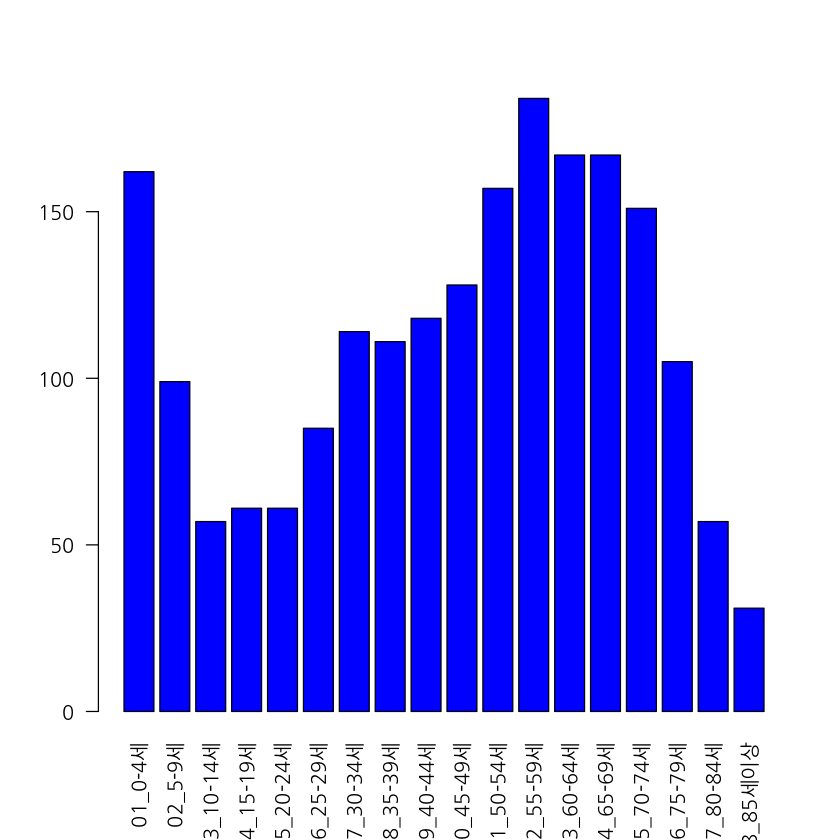

In [67]:
#년령별 진료환자 막대그래프
library(extrafont) # 한글폰트 처리
options(warn=-1) # ps font warning 제거 , 나중에 이유를 찿아봐야 함.
barplot(xx, las=2, col="blue", family="NanumGothic")  # 폰트를 한글폰트로 지정
options(warn=0) # 워닝 메세지 enable

   * 5세 미만 아기들의 진료 건수가 많습니다.
   * 10대 일때 진료 건수가 줄어들고 있습니다.
   * 이후 서서히 늘어나다, 50 대 이후에 최고로 늘어나고 이후 70 대 부터 줄어 즐기 시작합니다.
   * 70 대 이후에 줄어드는 것은 병원을 가는 횟수가 줄어다기 보다는 인구수가 줄어든것으로 생각됨.
   * 이것을 파악하려면, 연령대별 인구대비 비율 병원가는 비율을 봐야 할 것 같습니다.

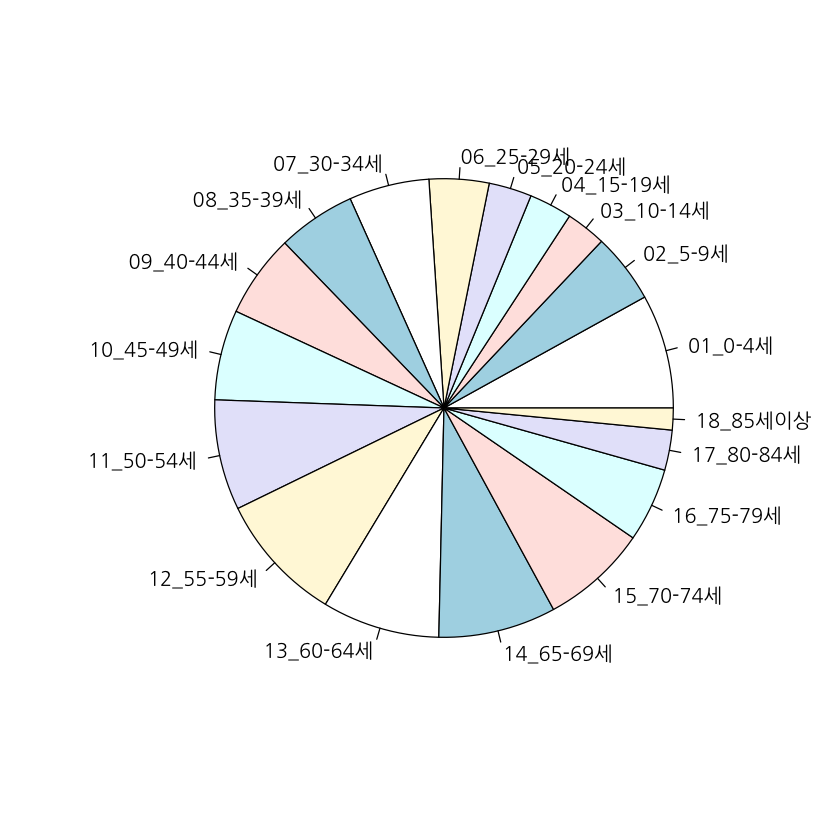

In [65]:
# 변수의 갯수가 많을 경우 대비해서 파이 챠트로 사용해봅니다. 이 경우는 막대그래프보다 수준별 차이를 보기가 어렵습니다.
library(extrafont)
options(warn=-1)
pie(xx,family="NanumGothic")
options(warn=0)

범주형 변수에서는 변수의 갯수가 많으면, 파이 차트는 보기가 쉽지 않습니다. 가급적이면 막대그래프를 활용하는것 이 좋습니다.